# Appendix A.4 - Pandas

The pandas a high-level library for high-performance, easy-to-use data structures and data analysis tools. Pandas is used to perform operations on both tabular and non-tabular types of data intuitively. It supports different types of relational operations such as joins, merging, etc., making it very powerful. It provides a fast and easy way to load data from multiple sources, including CSV files, SQL databases, etc. Once your data is in Pandas, it offers powerful methods for tasks such as:

- sorting, filtering, and aggregating values by certain criteria
- joining tables together
- reshaping and resizing datasets
- converting one type of data into another (e.g., a string into an integer)
- creating new columns based on existing ones
- filling missing values with something else or removing them entirely
- calculating statistical summaries such as standard deviation or mean average
- generating reports like pivot tables or graphs like histograms or scatter plots
- converting numerical values into human-readable strings like percentages or currency amounts

The main data structures are the **Series** object (which is a 1D arrays, similar to a columns in a spreadsheet) and the **DataFrame** object (which is an in-memory 2D table, like a spreadsheet, with column names and row labels).

Pandas and NumPy libraries are similar in many ways and can be used interchangeably. In general, Pandas is more powerful for data analysis. However, NumPy is faster and it has better performance on large datasets. 

First, let's import pandas. People usually import it as **pd**

In [2]:
import pandas as pd

## Series object

In [3]:
s = pd.Series([2,-1,3,5])
print(s)

0    2
1   -1
2    3
3    5
dtype: int64


Series objects behave like one-dimensional NumPy array, and we can often pass them as parameters to NumPy functions

In [4]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on series are also possible, and they apply **elementwise**

In [5]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a series object, that number is added to all items (**broadcasting**)

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as  - or /, and even conditional operations

In [7]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

### Index labels
Each item in a series has a unique identifier called the **index label**. By default, it is simply the rank of the item (starting at 0) but we can also set the index labels manually

In [8]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
print(s2)

alice       68
bob         83
charles    112
darwin      68
dtype: int64


You can then use a series just like a dict

In [9]:
s2["bob"]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the **loc** attribute when accessing by label, and the **iloc** attribute when accessing by integer location

In [12]:
s2.loc["bob"]

83

In [13]:
s2.iloc[1]

83

Slicing a series also slices the index labels

In [14]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

### Init from dict
You can create a series object from a dict. The keys will be used as index labels

In [15]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
print(s3)

alice     68
bob       83
colin     86
darwin    68
dtype: int64


You can control which elements you want to include in the series and in what order by explicitly specifying the desired index

In [16]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

### Automatic alignment
When an operation involves multiple series, Pandas automatically aligns items by matching index labels. The resulting Series contains the union of index labels from the involved object. If some are missing, these items get a **NaN** value (Not-a-Number).

In [17]:
print(s2.keys())
print(s3.keys())

print(s2 + s3)

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')
alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64


Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items.

### Init with a scalar
We can also initialize a series using a scalar and a list of index labels: all items will be set to the scalar

In [18]:
meaning = pd.Series(42, ["life", "universe", "everything"])
print(meaning)

life          42
universe      42
everything    42
dtype: int64


### Series name
A series can have a name

In [19]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
print(s6)

bob      83
alice    68
Name: weights, dtype: int64


### Plotting
Pandas makes it easy to plot series data using matplotlib. Just import matplotlib and call the plot() method.

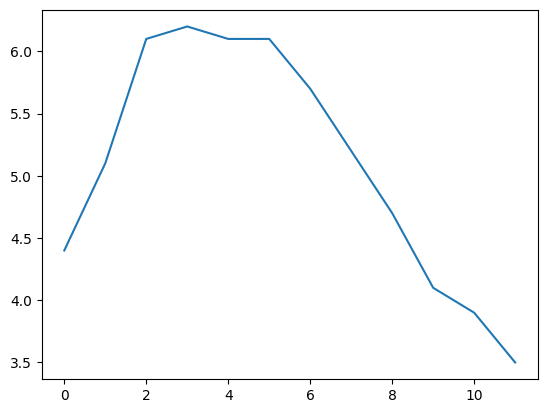

In [20]:
import matplotlib.pyplot as plt

temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

### Handling time
Many datasets have timestamps, and Pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

Let's start by creating a time series using **pd.date_range()** function. This returns a **DatetimeIndex**

In [21]:
dates = pd.date_range('2020/10/27 18:00', periods=12, freq='H')
print(dates)

DatetimeIndex(['2020-10-27 18:00:00', '2020-10-27 19:00:00',
               '2020-10-27 20:00:00', '2020-10-27 21:00:00',
               '2020-10-27 22:00:00', '2020-10-27 23:00:00',
               '2020-10-28 00:00:00', '2020-10-28 01:00:00',
               '2020-10-28 02:00:00', '2020-10-28 03:00:00',
               '2020-10-28 04:00:00', '2020-10-28 05:00:00'],
              dtype='datetime64[ns]', freq='H')


A DatetimeIndex may be used as an index in a series

In [22]:
temp_series = pd.Series(temperatures, dates)
print(temp_series)

2020-10-27 18:00:00    4.4
2020-10-27 19:00:00    5.1
2020-10-27 20:00:00    6.1
2020-10-27 21:00:00    6.2
2020-10-27 22:00:00    6.1
2020-10-27 23:00:00    6.1
2020-10-28 00:00:00    5.7
2020-10-28 01:00:00    5.2
2020-10-28 02:00:00    4.7
2020-10-28 03:00:00    4.1
2020-10-28 04:00:00    3.9
2020-10-28 05:00:00    3.5
Freq: H, dtype: float64


Let's plot this series:

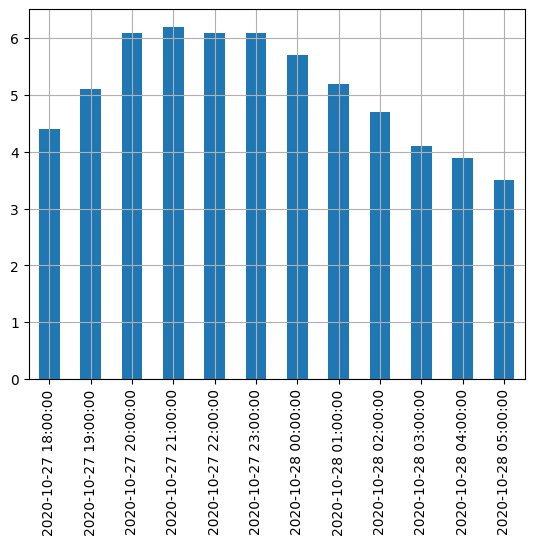

In [23]:
temp_series.plot(kind="bar")
plt.grid(True)
plt.show()

Pandas lets us **resample** a time series very simply. Just call the resample() method and specify a new frequency. However, this operation is actually a **deferred operation**: we did not get a new object, but a **DatetimeIndexResampler** object instead. To actually perform the resampling operation, we nees to call an aggregation method (like mean, min or max).

DatetimeIndexResampler [freq=<2 * Hours>, axis=0, closed=left, label=left, convention=start, origin=start_day]


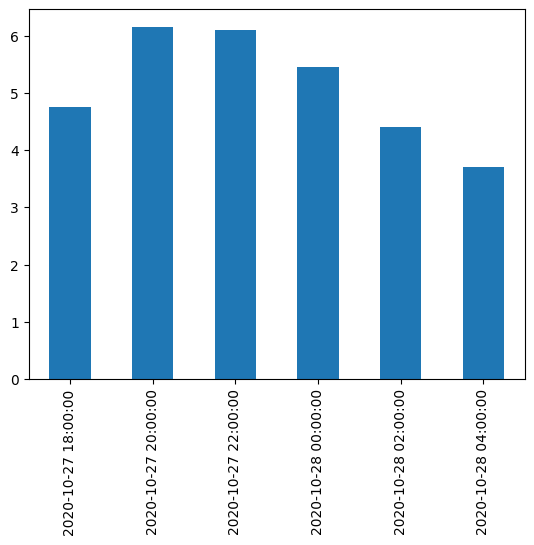

In [24]:
temp_series_freq_2H = temp_series.resample("2H")
print(temp_series_freq_2H)

temp_series_freq_2H = temp_series_freq_2H.mean()

temp_series_freq_2H.plot(kind="bar")
plt.show()

We can also **upsample** (increase the frequency), but this creates holes in our data

In [25]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

2020-10-27 18:00:00    4.4
2020-10-27 18:15:00    NaN
2020-10-27 18:30:00    NaN
2020-10-27 18:45:00    NaN
2020-10-27 19:00:00    5.1
2020-10-27 19:15:00    NaN
2020-10-27 19:30:00    NaN
2020-10-27 19:45:00    NaN
2020-10-27 20:00:00    6.1
2020-10-27 20:15:00    NaN
Freq: 15T, dtype: float64

One solution is to fill the gaps by **interpolating**. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation.

In [26]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2020-10-27 18:00:00    4.400000
2020-10-27 18:15:00    4.452911
2020-10-27 18:30:00    4.605113
2020-10-27 18:45:00    4.829758
2020-10-27 19:00:00    5.100000
2020-10-27 19:15:00    5.388992
2020-10-27 19:30:00    5.669887
2020-10-27 19:45:00    5.915839
2020-10-27 20:00:00    6.100000
2020-10-27 20:15:00    6.203621
Freq: 15T, dtype: float64

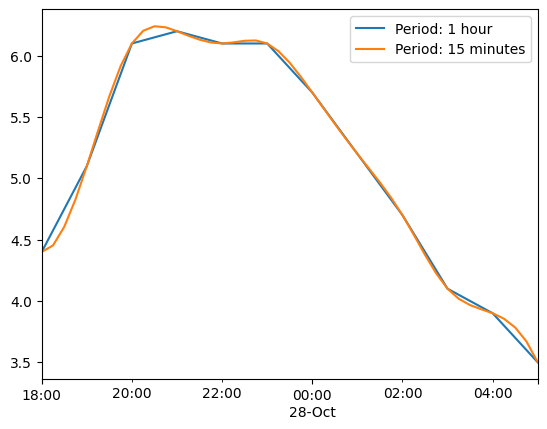

In [27]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

By default datetimes are *naive*: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. We can make datetimes timezone aware by calling the **tz_localize()** method:

In [28]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2020-10-27 18:00:00-04:00    4.4
2020-10-27 19:00:00-04:00    5.1
2020-10-27 20:00:00-04:00    6.1
2020-10-27 21:00:00-04:00    6.2
2020-10-27 22:00:00-04:00    6.1
2020-10-27 23:00:00-04:00    6.1
2020-10-28 00:00:00-04:00    5.7
2020-10-28 01:00:00-04:00    5.2
2020-10-28 02:00:00-04:00    4.7
2020-10-28 03:00:00-04:00    4.1
2020-10-28 04:00:00-04:00    3.9
2020-10-28 05:00:00-04:00    3.5
dtype: float64

The **pd.period_range()** function returns a **PeriodIndex** instead of a DatetimeIndex

In [29]:
quarters = pd.period_range('2020Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
             '2021Q3', '2021Q4'],
            dtype='period[Q-DEC]')

Adding a number N to a PeriodIndex shifts the periods by N times the PeriodIndex's frequency

In [30]:
quarters + 3

PeriodIndex(['2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1',
             '2022Q2', '2022Q3'],
            dtype='period[Q-DEC]')

The **asfreq()** method lets us change the frequency of the PeriodIndex. All periods are lengthened or shortened accordingly.

In [31]:
quarters.asfreq("M")

PeriodIndex(['2020-03', '2020-06', '2020-09', '2020-12', '2021-03', '2021-06',
             '2021-09', '2021-12'],
            dtype='period[M]')

In [32]:
quarters.asfreq("A")

PeriodIndex(['2020', '2020', '2020', '2020', '2021', '2021', '2021', '2021'], dtype='period[A-DEC]')

Of course we can create a series with a PeriodIndex

2020Q1    300
2020Q2    320
2020Q3    290
2020Q4    390
2021Q1    320
2021Q2    360
2021Q3    310
2021Q4    410
Freq: Q-DEC, dtype: int64


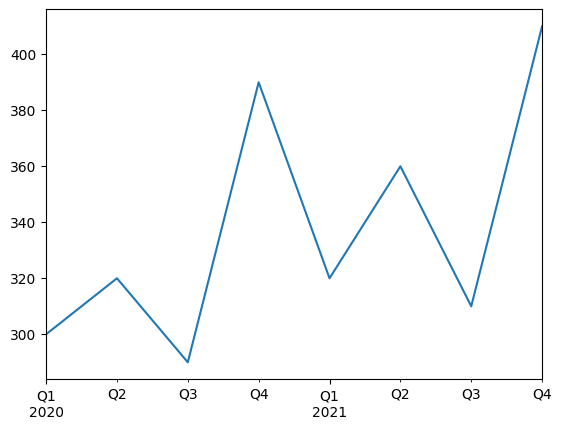

In [33]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
print(quarterly_revenue)

quarterly_revenue.plot(kind="line")
plt.show()

We can convert periods to timestamps by calling **to_timestamp**. By default this will give us the first day of each period, but by setting **how** and **freq**, we can get the last hour of each period

In [34]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2020-03-31 23:59:59.999999999    300
2020-06-30 23:59:59.999999999    320
2020-09-30 23:59:59.999999999    290
2020-12-31 23:59:59.999999999    390
2021-03-31 23:59:59.999999999    320
2021-06-30 23:59:59.999999999    360
2021-09-30 23:59:59.999999999    310
2021-12-31 23:59:59.999999999    410
dtype: int64

And back to periods by calling **to_period**

In [35]:
last_hours.to_period()

2020Q1    300
2020Q2    320
2020Q3    290
2020Q4    390
2021Q1    320
2021Q2    360
2021Q3    310
2021Q4    410
Freq: Q-DEC, dtype: int64

## DataFrame object

### Creating a DataFrame
You can create a dataframe by passing a dictionary of series objects

In [36]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:
* the series were automatically aligned based on their index,
* missing values are represented as NaN,
* series names are ignored (the name year was dropped),
* dataframes are displayed nicely in Jupyter notebooks

You can access columns pretty much as you would expect. They are returned a series objects

In [37]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once

In [38]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


If you pass a list of columns and/or index row labels to the constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist

In [39]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a dataframe is to pass all the values to the constructor as an NumPy array and specify the column names and row index labels separately

In [40]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


It is also possible to create a dataframe with a dictionary

In [41]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


### Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels

In [42]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

You can now get a DataFrame containing just some columns very simply

In [43]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

### Dropping a level
We can drop a column level by calling **droplevel()**

In [44]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

### Transposing

In [45]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

### Stacking and unstacking levels
Calling the **stack()** method will push the lowest column level after the lowest index

In [46]:
d7 = d6.stack()
d7

Paris London
birthyear alice       1985    NaN
          bob         1984    NaN
          charles      NaN   1992
hobby     alice     Biking    NaN
          bob      Dancing    NaN
weight    alice         68    NaN
          bob           83    NaN
          charles      NaN    112
children  bob          3.0    NaN
          charles      NaN    0.0

Calling **unstack()** will do the reverse

In [47]:
d8 = d7.unstack()
d8

Paris                  London             
            alice      bob charles  alice  bob charles
birthyear    1985     1984     NaN    NaN  NaN    1992
children      NaN      3.0     NaN    NaN  NaN     0.0
hobby      Biking  Dancing     NaN    NaN  NaN     NaN
weight         68       83     NaN    NaN  NaN     112

The stack() and unstack() methods let you select the level to stack/unstack. You can even stack/unstack multiple levels at once.

### Accessing rows

In [48]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


The loc attribute lets you access rows instead of columns. The result is a series object in which the dataframe column names are mapped to row index labels

In [49]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

We can also access rows by integer location using the iloc attribute

In [50]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

We can also get a slice of rows, and this returns a dataframe object

In [51]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Finally, we can pass a boolean array to get the matching rows

In [52]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


This is most useful when combined with boolean expressions

In [53]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


### Adding and removing columns

You can generally treat dataframe objects like dictionaries of Series

In [54]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [55]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

When you add a new colum, it must have the same number of rows. **Missing rows are filled with NaN, and extra rows are ignored**:

In [56]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1}) 
# alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the **insert()** method

In [57]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


We can also create new columns by calling the **assign()** method. Note that this returns a new dataframe object, the original is not modified

In [58]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


Note that we cannot access columns created within the same assignment

In [59]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


The solution is to split this assignment in two consecutive assignments:

In [60]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


Having to create a temporary variable is not very convenient, anyway **we cannot chain assigments**, because the object is not actually modified by the first assignment

In [61]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


The solution is to pass a function to the assign() method (typically a **lambda**), this function will be called with the dataframe as a parameter

In [62]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


### Evaluating an expression
A great feature supported by Pandas is expression evaluation. This relies on the **numexpr**

In [63]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Assignment expressions are also supported. Let's set **inplace=True** to directly modify the dataframe rather than getting a modified copy

In [64]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,33,True,NaN,22.985398
bob,Dancing,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


We can use a local or global variable in an expression by prefixing it with @

In [65]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


### Querying
The **query()** method lets you filter a dataframe based on a query expression

In [66]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


### Sorting
We can sort a dataframe by calling its **sort_index** method. By default it sorts the rows by their index label, in ascending order.

In [67]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,Dancing,181,83,34,True,0.0,25.335002,False
alice,Biking,172,68,33,True,NaN,22.985398,False


Note that sort_index returned a sorted copy of the dataframe. To modify directly, we can set the inplace argument to True. Also, we can sort the columns instead of the rows by setting axis=1

In [68]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


To sort the dataframe by values instead of labels, we can use **sort_values** and specify the column to sort by

In [69]:
people.sort_values(by="body_mass_index", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


### Plotting
Just like for deries, Pandas makes it easy to draw nice graphs based on a dataframe.

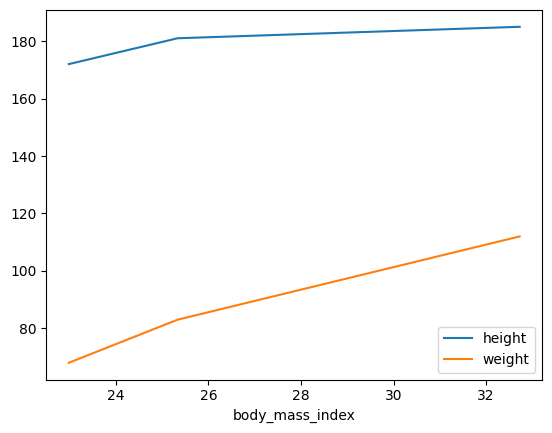

In [70]:
people.plot(kind = "line", x = "body_mass_index", y = ["height", "weight"])
plt.show()

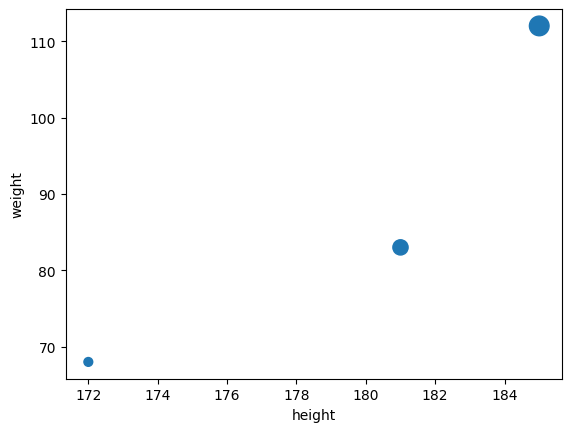

In [71]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

### Overview functions
When dealing with large dataframes, it is useful to get a quick overview of its content. Notice how Jupyter displays only the corners of a big dataframe

In [80]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 6))
large_df = pd.DataFrame(much_data, columns=list("ABCDEF"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0
...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0


The **head()** method returns the top 5 rows

In [81]:
large_df.head()

,A,B,C,some_text,D,E,F
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0


The **tail()** function returns the bottom 5 rows (or we can pass the number we want)

In [82]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0


The **info()** method prints out a summary of each columns contents

In [83]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


Finally, the **describe()** method gives a nice overview of the main aggregated values over each column:
- count: number of non-null (not NaN) values
- mean: mean of non-null values
- std: standard deviation of non-null values
- min: minimum of non-null values
- 25%, 50%, 75%: 25th, 50th and 75th percentile of non-null values
- max: maximum of non-null values

In [84]:
large_df.describe()

,A,B,C,D,E,F
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


### Saving & loading
Pandas can save DataFrames to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database.

In [85]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


Let's save it to CSV, HTML and JSON. Saving to other formats works very similarly, but some formats require extra libraries to be installed. For example, saving to Excel requires the openpyxl library.

In [86]:
my_df.to_csv("data/my_df.csv")
my_df.to_html("data/my_df.html")
my_df.to_json("data/my_df.json")

In [89]:
for filename in ("data/my_df.csv", "data/my_df.html", "data/my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()

# data/my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# data/my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# data/my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



Now let's load our CSV file back into a dataframe. There are similar read_json, read_html, read_excel functions as well.

In [90]:
my_df_loaded = pd.read_csv("data/my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Operations on DataFrames
Although dataframe do not try to mimick NumPy arrays, there are a few similarities.

In [91]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


You can apply NumPy mathematical functions on a dataframe

In [92]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a dataframe will add that value to all elements in the dataframe (**broadcasting**)

In [93]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


The same is true for all other binary operations, including arithmetic and conditional operations

In [94]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Aggregation operations, such as max, sum or mean of a dataframe, apply to each column, and we get back a series object

In [95]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

The **all()** method is also an aggregation operation: it checks whether all values are True or not.

In [96]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional axis parameter which lets you specify along which axis of the dataframe you want the operation executed. The default is axis=0 (operation is executed vertically on each column, we can set axis=1 to execute the horizontally (on each row).

In [97]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The **any()** method returns True if any value is True

In [98]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

If you add a series to a dataframe (or any other binary operation), Pandas attempts to broadcast the operation to all rows. This only works if the series has the same size as the dataframe rows.

In [99]:
grades - grades.mean() 

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


### Automatic alignment
Similar to series, when operating on multiple dataframes, Pandas automatically aligns them by row index label, but also by column names. 

In [100]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [101]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


### Handling missing data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
For example, we can decide that missing data should result in a zero, instead of NaN. We can replace all NaN values by a any value using the **fillna()** method

In [102]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros:

In [103]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Another way to handle missing data is to **interpolate**.

In [104]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [105]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [106]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [107]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


The **dropna()** method gets rid of rows that are full of NaNs

In [108]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


We can remove also columns that are full of NaNs by setting the axis argument to 1

In [109]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


### Aggregating
Similar to the SQL language, pandas allows grouping your data into groups to run calculations over each group.

In [110]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


Now let's group data in this dataframe using the **groupby()** method

In [96]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

We are ready to compute the average grade per hobby:

In [97]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


Note that the NaN values have simply been skipped when computing the means

### Pivot tables
Pandas supports spreadsheet-like pivot tables that allow quick data summarization

In [98]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


Now we can call the **pd.pivot_table()** function for this DataFrame, asking to group by the name column. By default, pivot_table() computes the mean of each numeric column

In [99]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"])

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


We can change the aggregation function by setting the **aggfunc** argument

In [100]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


We can also specify the columns to aggregate over horizontally, and request the grand totals for each row and column by setting **margins=True**

In [101]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


### Combining
One powerful feature of Pandas is it's ability to perform SQL-like joins on dataframes. Various types of joins are supported: inner joins, left/right outer joins and full joins.

In [102]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [103]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


We can join DataFrames using the **merge()** function. If both dataframes have a column with same name, Pandas creates two new columns. Also, note that columns thant don't exist in both dataframes are dropped. This is the equivalent of a SQL **INNER JOIN**

In [104]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


If we want a **FULL OUTER JOIN**, you must specify **how=outer**

In [105]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


Of course **LEFT/RIGTH OUTER JOIN** is also available by setting **how=left/right**.

In [106]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


### Concatenation
Rather than joining dataframes, we may just want to concatenate them. That's what **concat()** is for:

In [107]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index. Pandas handles this rather gracefully

In [108]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


Or you can tell Pandas to just ignore the index

In [109]:
pd.concat([city_loc, city_pop], ignore_index=True)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


Notice that when a column does not exist in a dataframe, it acts as if it was filled with NaN values. If we set join=inner, then only columns that exist in both dataframes are returned

In [110]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


You can concatenate dataframes horizontally instead of vertically by setting axis=1

In [111]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In this case it really does not make much sense because the indices do not align well. So let's reindex the dataframes before concatenating

In [112]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

,state,lat,lng,population,state
city,,,,,
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


### Categories
It is quite frequent to have values that represent categories. These categorical values can be hard to read and cumbersome to handle, but fortunately pandas makes it easy

In [114]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


In [115]:
city_eco["economy"] = city_eco["eco_code"].astype('category')
city_eco["economy"].cat.categories

Index([17, 20, 34], dtype='int64')

Note that categorical values are sorted according to their categorical order, *not* their alphabetical order:

In [117]:
city_eco.sort_values(by="economy", ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,34
6,2242193,Houston,Texas,20,20
3,808976,San Francisco,California,17,17
4,8363710,New York,New-York,17,17
